In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
y = y.reshape((y.shape[0],1))

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
# Fitting Random Forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

C:\Users\zd\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=0)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [28]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

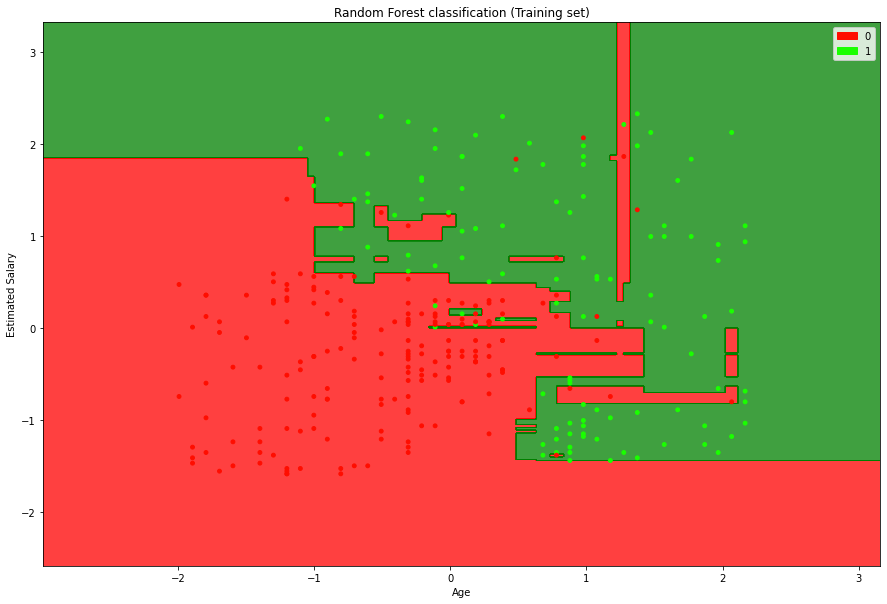

In [29]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.figure(figsize=(15,10))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

num_labels = 2
bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
color_array = ['#ff0d00','#1aff00']
cmap_bold = ListedColormap(color_array)
patch1 = mpatches.Patch(color='#ff0d00', label='0')
patch2 = mpatches.Patch(color='#1aff00', label='1')

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set,cmap=cmap_bold,s=15)

plt.title('Random Forest classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend((patch1, patch2),("0","1"))
plt.show()

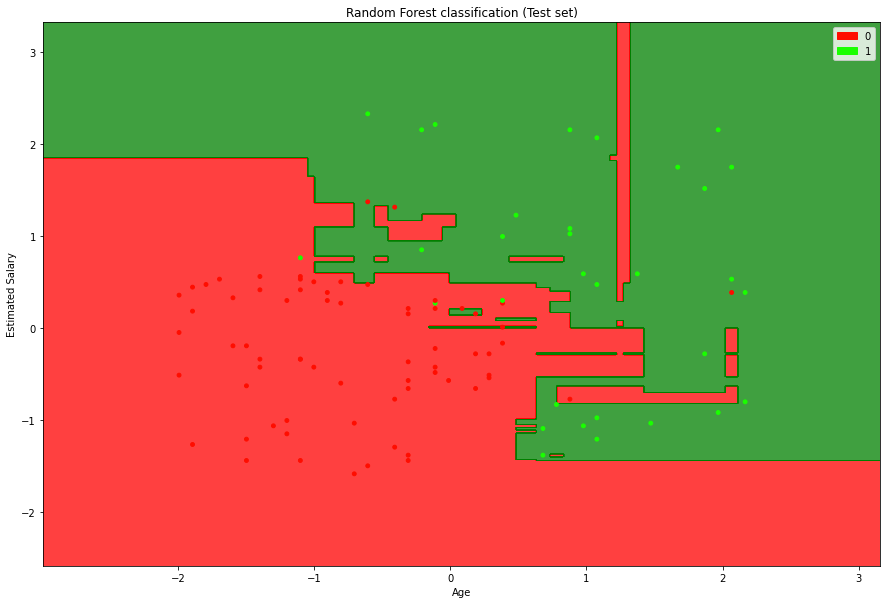

In [30]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.figure(figsize=(15,10))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

num_labels = 2
bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
color_array = ['#ff0d00','#1aff00']
cmap_bold = ListedColormap(color_array)
patch1 = mpatches.Patch(color='#ff0d00', label='0')
patch2 = mpatches.Patch(color='#1aff00', label='1')

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set,cmap=cmap_bold,s=15)

plt.title('Random Forest classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend((patch1, patch2),("0","1"))
plt.show()